In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()

In [2]:
G = 0.01720209895**2 # AU³ days⁻² Ms⁻¹

def n(a, m0=1., m1=9.54e-4):
    return np.sqrt(G * (m0 + m1) / a**3)

def get_data(path, l="C"):
    d = "," if l == "C" else None
    try:
        data = np.genfromtxt(path, delimiter=d)
    except ValueError as err:
        try:
            data = np.genfromtxt(path, skip_footer=1, delimiter=d)
            print("Still writing...")
        except:
            raise ValueError (err)
    return data

In [3]:
F = get_data(os.path.join(cwd, "Fortran", "Salida3.txt"), "F")
C = get_data(os.path.join(cwd, "C", "Salida3.txt"), "C")

print("Shape F:", F.shape)
print("Shape C:", C.shape)

Shape F: (3389, 7)
Shape C: (3391, 7)


In [4]:
a1f = F[:, 0]
e1f = F[:, 1]
s1f = F[:, 2]
o1f = F[:, 3]
s0f = F[:, 4]
o0f = F[:, 5]
tf  = F[:, 6] / 365.2563

a1c = C[:, 0]
e1c = C[:, 1]
s1c = C[:, 2]
o1c = C[:, 3]
s0c = C[:, 4]
o0c = C[:, 5]
tc  = C[:, 6] / 365.2563

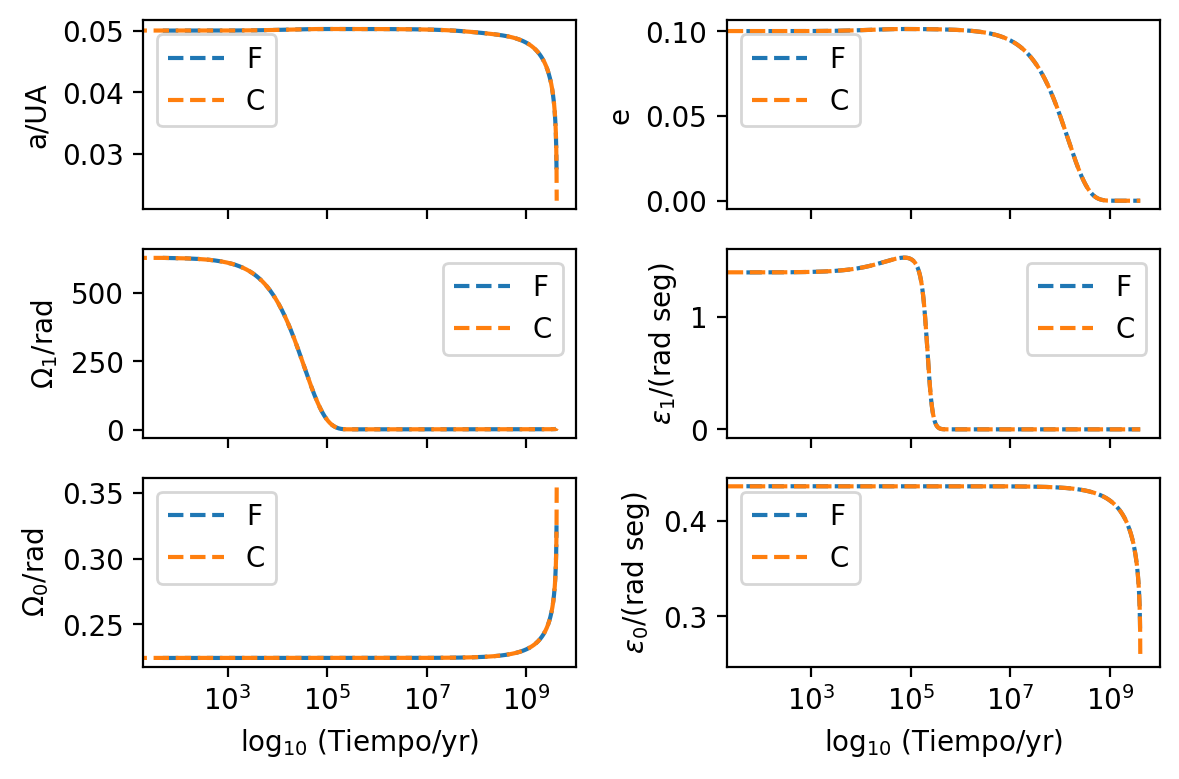

In [5]:
fig, axs = plt.subplots(3, 2, sharex=True, dpi=200)

axs[0,0].plot(tf, a1f, '--', ms=0.7, label="F")
axs[0,1].plot(tf, e1f, '--', ms=0.7, label="F")
axs[1,0].plot(tf, s1f, '--', ms=0.7, label="F")
axs[1,1].plot(tf, o1f, '--', ms=0.7, label="F")
axs[2,0].plot(tf, s0f, '--', ms=0.7, label="F")
axs[2,1].plot(tf, o0f, '--', ms=0.7, label="F")

axs[0,0].plot(tc, a1c, '--', ms=0.7, label="C")
axs[0,1].plot(tc, e1c, '--', ms=0.7, label="C")
axs[1,0].plot(tc, s1c, '--', ms=0.7, label="C")
axs[1,1].plot(tc, o1c, '--', ms=0.7, label="C")
axs[2,0].plot(tc, s0c, '--', ms=0.7, label="C")
axs[2,1].plot(tc, o0c, '--', ms=0.7, label="C")

for ax in axs.flat:
    ax.semilogx()
    ax.legend()


axs[0,0].set_ylabel("a/UA")
axs[0,1].set_ylabel("e")
axs[1,0].set_ylabel('$\Omega_1$/rad')
axs[1,1].set_ylabel('$\epsilon_1$/(rad seg)')
axs[2,0].set_ylabel('$\Omega_0$/rad')
axs[2,1].set_ylabel('$\epsilon_0$/(rad seg)')

for ax in axs.flat[-2:]:
    ax.set_xlabel("log$_{10}$ (Tiempo/yr)")

fig.tight_layout()
plt.show()

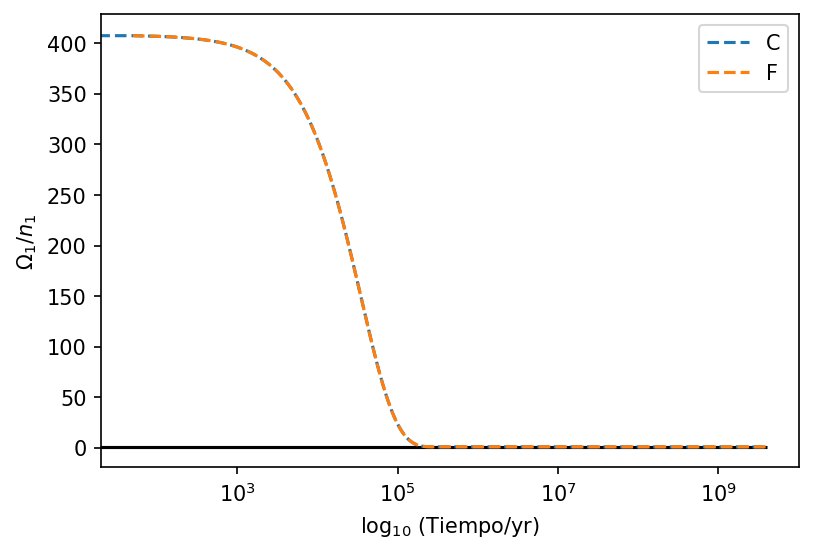

In [6]:
plt.figure(dpi=150)
plt.plot(tc, s1c / n(a1c), '--', label='C')
plt.plot(tf, s1f / n(a1f), '--', label='F')
plt.hlines(1, tc[0], tc[-1], 'k')
plt.semilogx()
plt.xlabel("log$_{10}$ (Tiempo/yr)")
plt.ylabel("$\Omega_1/n_1$")
plt.legend()
plt.show()

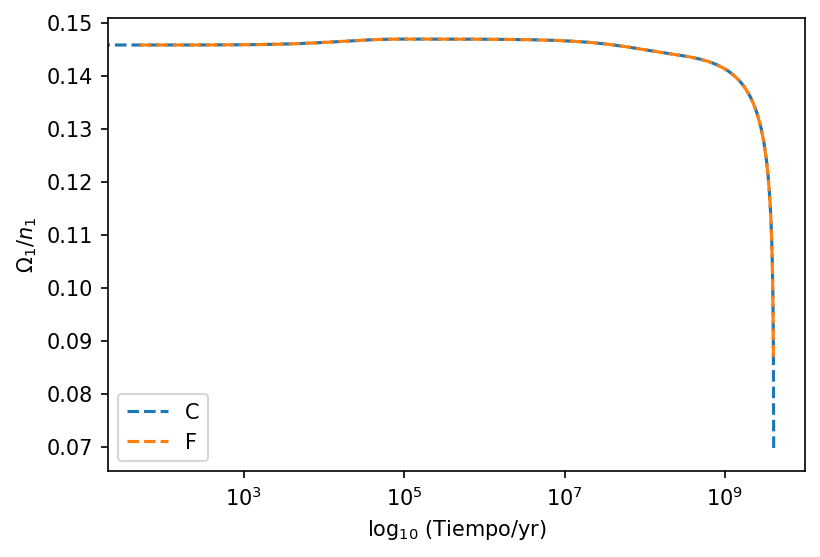

In [7]:
plt.figure(dpi=150)
plt.plot(tc, s0c / n(a1c), '--', label='C')
plt.plot(tf, s0f / n(a1f), '--', label='F')
plt.semilogx()
plt.xlabel("log$_{10}$ (Tiempo/yr)")
plt.ylabel("$\Omega_1/n_1$")
plt.legend()
plt.show()